In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
import random

Using TensorFlow backend.


In [2]:
#Random start of population
#genomes as a list of gene sequences
def initialise():
    genomes =[]
    for i in range(2):
        genomes.append([np.random.randint(2, size=6)]) # add 5 randomly initialised indiviudals
    
    return genomes

    

In [3]:
#usefull functions

def paring(mom,dad):
    return(np.concatenate((mom[:3], dad[3:]), axis=0))


def mutation(popul):
    position = random.randrange(0, len(popul))
    gencode = popul[position]
    
    decider = random.uniform(0, 1)
    posi = 0
    if decider < 0.2 :
        print('Mutation')
        posi = random.randrange(0, len(gencode))
    
        if gencode[posi] == 1:
            gencode[posi] = 0
        elif gencode[posi] == 0:
            gencode[posi] = 1
            
    popul[position] = np.array(gencode)
    
    return popul


def selected(maxis, actualpop):
    childs= []
    maxis= np.array(maxis)
    indices = maxis.argsort()[-2:][::-1]
    print('Highest acc at')
    print(indices)
    parents= []
    
  
    for ind in indices:
    
        for k in actualpop[ind]:
         
         
            k=list(k)
            parents.append(k)
   
    
    random.shuffle(parents)
    f= 0
    while f < len(parents)-1: 
        mom = parents[f]
        f= f +1
        dad = parents[f]     
        child = paring(mom,dad)
        childs.append(child)
        child = paring(dad,mom)
        childs.append(child)
        
        
    return childs


def selected2(maxis, actualpop):
    childs= []
    maxis= np.array(maxis)
    indices = maxis.argsort()[-2:][::-1]
    print('Highest acc at')
    print(indices)
    parents= []
    
   
    for ind in indices:    
        parents.append(actualpop[ind])
            
   
    
    random.shuffle(parents)
    f= 0
    while f < len(parents)-1: 
        mom = parents[f]
        f= f +1
        dad = parents[f]     
        child = paring(mom,dad)
        childs.append(child)
        child = paring(dad,mom)
        childs.append(child)
        
        
    return childs

In [4]:
def netzdurchlauf(acutalpop):
    accuracy_of_population= []
    
    print('Aktuelle Population')
    print(actualpop)
    for element in actualpop:
        batch_size = 128
        num_classes = 10
        epochs = 12

        # input image dimensions
        img_rows, img_cols = 28, 28

        # the data, split between train and test sets
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        if K.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255
#             print('x_train shape:', x_train.shape)
#             print(x_train.shape[0], 'train samples')
#             print(x_test.shape[0], 'test samples')

        # convert class vectors to binary class matrices
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        model = Sequential()




        model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
            ########
            
            

        for gen in element:
            if (gen== 0):
                model.add(Conv2D(64, (3, 3), activation='relu'))
            elif (gen == 1):
                model.add(Dense(128, activation='relu'))




        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                          optimizer=keras.optimizers.Adadelta(),
                          metrics=['accuracy'])

        model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        accuracy_of_population.append(score[1])
        
    return (accuracy_of_population)

In [5]:

# umschreiben ist nur der erste durchlauf

def netzdurchlauf1(acutalpop):
    accuracy_of_population= []
    
    print('Aktuelle Population')
    print(actualpop)
    for element in actualpop:
        for indiv in element:
            batch_size = 128
            num_classes = 10
            epochs = 12

            # input image dimensions
            img_rows, img_cols = 28, 28

            # the data, split between train and test sets
            (x_train, y_train), (x_test, y_test) = mnist.load_data()

            if K.image_data_format() == 'channels_first':
                x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
                x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
                input_shape = (1, img_rows, img_cols)
            else:
                x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
                x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
                input_shape = (img_rows, img_cols, 1)

            x_train = x_train.astype('float32')
            x_test = x_test.astype('float32')
            x_train /= 255
            x_test /= 255
#             print('x_train shape:', x_train.shape)
#             print(x_train.shape[0], 'train samples')
#             print(x_test.shape[0], 'test samples')

            # convert class vectors to binary class matrices
            y_train = keras.utils.to_categorical(y_train, num_classes)
            y_test = keras.utils.to_categorical(y_test, num_classes)

            model = Sequential()




            model.add(Conv2D(32, kernel_size=(3, 3),
                             activation='relu',
                             input_shape=input_shape))
            model.add(Conv2D(64, (3, 3), activation='relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(0.25))
            ########
            
            

            for gen in indiv:
                if (gen== 0):
                    model.add(Conv2D(64, (3, 3), activation='relu'))
                elif (gen == 1):
                    model.add(Dense(128, activation='relu'))




            model.add(Flatten())
            model.add(Dropout(0.5))
            model.add(Dense(num_classes, activation='softmax'))

            model.compile(loss=keras.losses.categorical_crossentropy,
                          optimizer=keras.optimizers.Adadelta(),
                          metrics=['accuracy'])

            model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))
            score = model.evaluate(x_test, y_test, verbose=0)
            print('Test loss:', score[0])
            print('Test accuracy:', score[1])
            accuracy_of_population.append(score[1])
        
    return (accuracy_of_population)



In [7]:

# Hauptmethode

DURCHGÄNGE = 10 # variable to clarify number of generations
actualpop= initialise()
evalaccuris = []
saved = actualpop
i = 0
if i == 0:
    accuri = netzdurchlauf1(actualpop)
    print(' Accuracy of first population')
    print(accuri)
    print('highest accuracy of first population:')
    print(np.amax(accuri))
    actualpop = selected(accuri, actualpop)
    actualpop = mutation(actualpop)
    evalaccuris.append([i +1 ,np.amax(accuri)])
    i= i+1
    
    
while i < DURCHGÄNGE:
    
    nummer = i
    accuri = netzdurchlauf(actualpop)
    print(' Accuracy of populationnummer: ')
    print( nummer)
    print(accuri)
    print('highest accuracy of populationnummer: ')
    print( nummer)
    print(np.amax(accuri))
    print(actualpop)
    actualpop = selected2(accuri, actualpop)
    actualpop = mutation(actualpop)
    
    evalaccuris.append([i +1 ,np.amax(accuri)])
    i = i+1
    
    
    
print('The highest accuracies in population')
print(evalaccuris)  




Aktuelle Population
[[array([1, 1, 1, 1, 0, 1])], [array([1, 1, 1, 0, 1, 0])]]


W0914 15:36:30.713404  1892 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0914 15:36:30.729377  1892 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0914 15:36:30.731361  1892 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0914 15:36:30.763274  1892 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0914 15:36:30.765281  1892 deprecation_wrapper.py:119] From C:\Users\vivia\Ana

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 276us/step - loss: 0.2609 - acc: 0.9184 - val_loss: 0.0667 - val_acc: 0.9803
Epoch 2/12
60000/60000 [==============================] - 14s 229us/step - loss: 0.0815 - acc: 0.9760 - val_loss: 0.0485 - val_acc: 0.9835
Epoch 3/12
60000/60000 [==============================] - 13s 218us/step - loss: 0.0618 - acc: 0.9811 - val_loss: 0.0431 - val_acc: 0.9855
Epoch 4/12
60000/60000 [==============================] - 13s 212us/step - loss: 0.0518 - acc: 0.9845 - val_loss: 0.0374 - val_acc: 0.9885
Epoch 5/12
60000/60000 [==============================] - 14s 226us/step - loss: 0.0456 - acc: 0.9859 - val_loss: 0.0329 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 14s 232us/step - loss: 0.0402 - acc: 0.9880 - val_loss: 0.0343 - val_acc: 0.9883
Epoch 7/12
60000/60000 [==============================] - 14s 228us/step - loss: 0.0352 - acc: 0.9889 - val_loss: 0.

60000/60000 [==============================] - 13s 218us/step - loss: 0.0774 - acc: 0.9765 - val_loss: 0.0400 - val_acc: 0.9881
Epoch 3/12
60000/60000 [==============================] - 12s 203us/step - loss: 0.0562 - acc: 0.9826 - val_loss: 0.0352 - val_acc: 0.9892
Epoch 4/12
60000/60000 [==============================] - 13s 219us/step - loss: 0.0460 - acc: 0.9859 - val_loss: 0.0339 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 12s 207us/step - loss: 0.0403 - acc: 0.9878 - val_loss: 0.0320 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.0349 - acc: 0.9890 - val_loss: 0.0366 - val_acc: 0.9893
Epoch 7/12
60000/60000 [==============================] - 12s 192us/step - loss: 0.0321 - acc: 0.9897 - val_loss: 0.0242 - val_acc: 0.9919
Epoch 8/12
60000/60000 [==============================] - 11s 189us/step - loss: 0.0301 - acc: 0.9908 - val_loss: 0.0232 - val_acc: 0.9923
Epoch 9/12
60000/60000 [==============

60000/60000 [==============================] - 11s 184us/step - loss: 0.0450 - acc: 0.9865 - val_loss: 0.0287 - val_acc: 0.9902
Epoch 5/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.0378 - acc: 0.9889 - val_loss: 0.0296 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.0314 - acc: 0.9904 - val_loss: 0.0268 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.0288 - acc: 0.9906 - val_loss: 0.0238 - val_acc: 0.9917
Epoch 8/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.0253 - acc: 0.9919 - val_loss: 0.0214 - val_acc: 0.9928
Epoch 9/12
60000/60000 [==============================] - 11s 189us/step - loss: 0.0238 - acc: 0.9925 - val_loss: 0.0235 - val_acc: 0.9930
Epoch 10/12
60000/60000 [==============================] - 11s 182us/step - loss: 0.0215 - acc: 0.9932 - val_loss: 0.0221 - val_acc: 0.9926
Epoch 11/12
60000/60000 [============

60000/60000 [==============================] - 13s 215us/step - loss: 0.0294 - acc: 0.9911 - val_loss: 0.0300 - val_acc: 0.9898
Epoch 7/12
60000/60000 [==============================] - 13s 212us/step - loss: 0.0266 - acc: 0.9918 - val_loss: 0.0307 - val_acc: 0.9891
Epoch 8/12
60000/60000 [==============================] - 13s 215us/step - loss: 0.0238 - acc: 0.9926 - val_loss: 0.0248 - val_acc: 0.9915
Epoch 9/12
60000/60000 [==============================] - 12s 204us/step - loss: 0.0209 - acc: 0.9935 - val_loss: 0.0241 - val_acc: 0.9918
Epoch 10/12
60000/60000 [==============================] - 11s 188us/step - loss: 0.0185 - acc: 0.9942 - val_loss: 0.0231 - val_acc: 0.9926
Epoch 11/12
60000/60000 [==============================] - 12s 195us/step - loss: 0.0177 - acc: 0.9942 - val_loss: 0.0237 - val_acc: 0.9929
Epoch 12/12
60000/60000 [==============================] - 12s 193us/step - loss: 0.0158 - acc: 0.9949 - val_loss: 0.0279 - val_acc: 0.9907
Test loss: 0.02787275015717314
Test

60000/60000 [==============================] - 11s 185us/step - loss: 0.0237 - acc: 0.9925 - val_loss: 0.0231 - val_acc: 0.9927
Epoch 9/12
60000/60000 [==============================] - 12s 195us/step - loss: 0.0211 - acc: 0.9935 - val_loss: 0.0217 - val_acc: 0.9922
Epoch 10/12
60000/60000 [==============================] - 12s 195us/step - loss: 0.0190 - acc: 0.9940 - val_loss: 0.0242 - val_acc: 0.9930
Epoch 11/12
60000/60000 [==============================] - 12s 194us/step - loss: 0.0171 - acc: 0.9944 - val_loss: 0.0218 - val_acc: 0.9932
Epoch 12/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.0160 - acc: 0.9948 - val_loss: 0.0229 - val_acc: 0.9924
Test loss: 0.022948477862845176
Test accuracy: 0.9924
Element
[0 1 1 0 1 0]
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 207us/step - loss: 0.3073 - acc: 0.9012 - val_loss: 0.0660 - val_acc: 0.9777
Epoch 2/12
60000/60000 [========================

(0.99, 1)

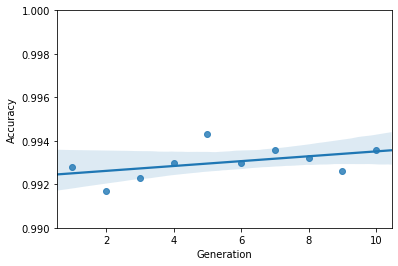

In [25]:
df = pd.DataFrame(data =evalaccuris)
df.rename(columns={0: 'Generation',1:'Accuracy'}, inplace=True)
sns.regplot(x=df['Generation'],y=df['Accuracy'])
plt.ylim(0.990, 1)

